# Studio distribuzione variabili quantitative

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [71]:
df = pd.read_csv('C:/Users/loren/Desktop/Python/Pandas/googleplaystore/task 1 googleplaystore pulito.csv')

In [72]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 981.1+ KB


In [74]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.192463,2.168041e+05,19.330391,7.798170e+06,1.097231
std,0.496055,1.831430e+06,20.585039,5.376973e+07,16.851618
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [75]:
def distribuzione(df, serie):
    
    # Rappresentazione tabellare
    tabella = pd.DataFrame({
        'Statistic': ['Count', 'Mean', 'Mode', 'Std', 'Skew', 'Min', 'Q1', 'Median Q2', 'Q3', 'Max', 'IQR', 'Range'],
        'Value': [
        df[serie].count(),
        df[serie].mean(),
        df[serie].value_counts().idxmax(),
        df[serie].std(),
        df[serie].skew(),
        df[serie].min(),
        df[serie].quantile(0.25),
        df[serie].quantile(0.50),
        df[serie].quantile(0.75),
        df[serie].max(),
        df[serie].quantile(0.75)-df[serie].quantile(0.25),
        df[serie].max()-df[serie].min()
        ]
    }).round(2)

    #stile grafico
    #plt.style.available
    plt.style.use('seaborn-v0_8-darkgrid')

    # Rappresentazione grafica della distribuzione dei dati della variabile
    # Rappresentazione dei quartili & deviazione standard
    q1 = df[serie].quantile(0.25)
    q2 = df[serie].quantile(0.50)
    q3 = df[serie].quantile(0.75)
    std = df[serie].std()

    # Creazione istagramma 
    plt.figure(figsize=(8, 6))
    sns.histplot(df[serie], bins= 40, kde=True, color='gray', )
    plt.title(f'Distribuzione {serie}')
    plt.grid(False)
    plt.xlabel('')
    plt.ylabel('')
    plt.axvline(q1, color= 'orange', linewidth=1.5, label='Q1')
    plt.axvline(q2, color= 'red', linewidth=1.5, label='Q2 Mediana')
    plt.axvline(q3, color= 'orange', linewidth=1.5, label='Q3')
    plt.axvline(q2-std, color= 'skyblue', linewidth=0.5)
    plt.axvline(q2+std, color= 'skyblue', linewidth=0.5, label= 'std')
    plt.legend()

    return tabella

Statistiche per variabile:   RATING


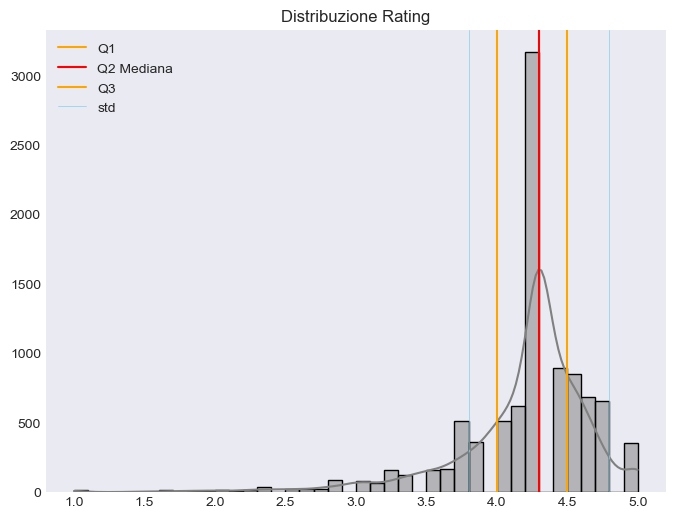

    Statistic    Value
0       Count  9659.00
1        Mean     4.19
2        Mode     4.30
3         Std     0.50
4        Skew    -1.98
5         Min     1.00
6          Q1     4.00
7   Median Q2     4.30
8          Q3     4.50
9         Max     5.00
10        IQR     0.50
11      Range     4.00




Statistiche per variabile:   REVIEWS


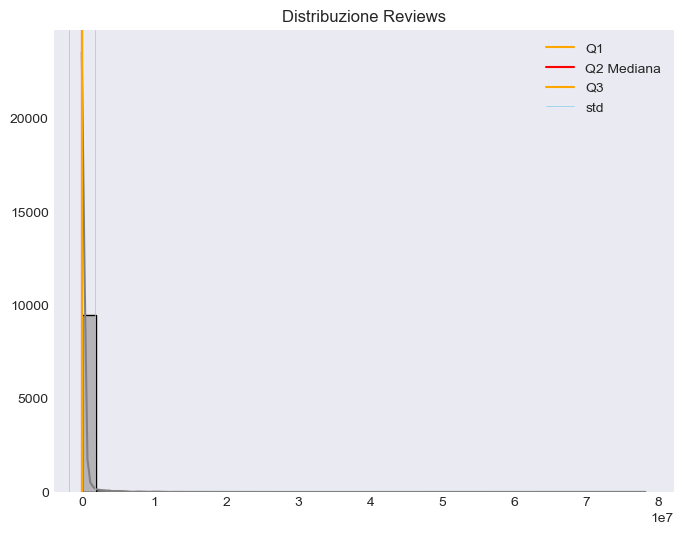

    Statistic        Value
0       Count      9659.00
1        Mean    216804.11
2        Mode         0.00
3         Std   1831430.21
4        Skew        26.57
5         Min         0.00
6          Q1        25.00
7   Median Q2       969.00
8          Q3     29453.50
9         Max  78158306.00
10        IQR     29428.50
11      Range  78158306.00




Statistiche per variabile:   SIZE


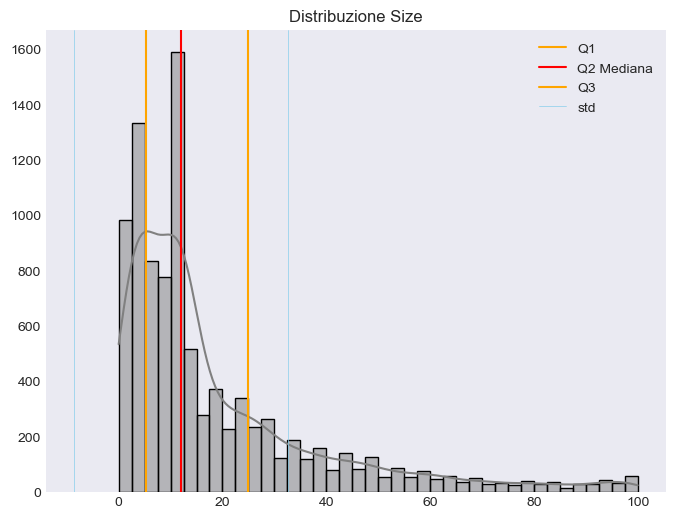

    Statistic    Value
0       Count  9659.00
1        Mean    19.33
2        Mode    12.00
3         Std    20.59
4        Skew     1.86
5         Min     0.01
6          Q1     5.30
7   Median Q2    12.00
8          Q3    25.00
9         Max   100.00
10        IQR    19.70
11      Range    99.99




Statistiche per variabile:   INSTALLS


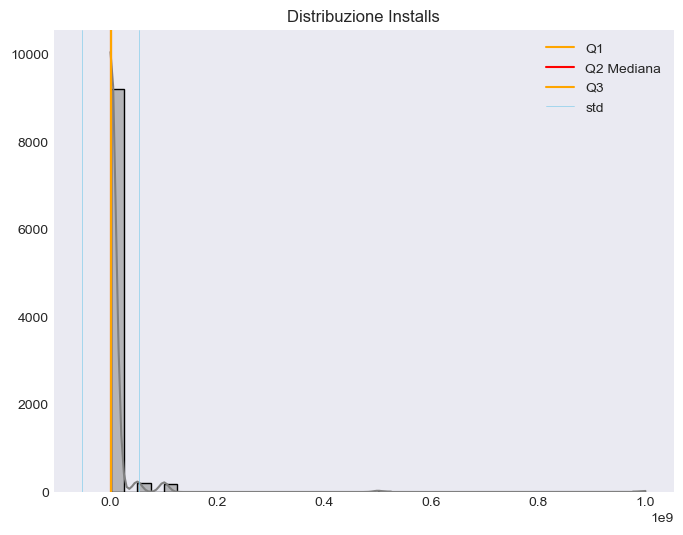

    Statistic         Value
0       Count  9.659000e+03
1        Mean  7.798170e+06
2        Mode  1.000000e+06
3         Std  5.376973e+07
4        Skew  1.503000e+01
5         Min  0.000000e+00
6          Q1  1.000000e+03
7   Median Q2  1.000000e+05
8          Q3  1.000000e+06
9         Max  1.000000e+09
10        IQR  9.990000e+05
11      Range  1.000000e+09




Statistiche per variabile:   PRICE


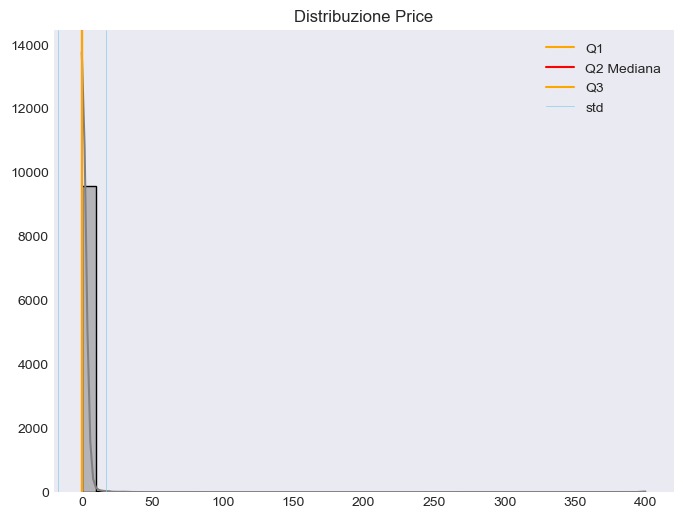

    Statistic    Value
0       Count  9659.00
1        Mean     1.10
2        Mode     0.00
3         Std    16.85
4        Skew    22.53
5         Min     0.00
6          Q1     0.00
7   Median Q2     0.00
8          Q3     0.00
9         Max   400.00
10        IQR     0.00
11      Range   400.00






In [76]:
l = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

for serie in l:
   print(f'Statistiche per variabile:   {serie.upper()}')
   tabella = distribuzione(df, serie)
   plt.show()
   print(tabella)
   print("\n" + "\n" + "="*150+ "\n" + "\n")